<a href="https://colab.research.google.com/github/prajjwa/SmartKnower-Prajjwal-Singh/blob/master/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests # webscrapping worldometer
import pandas as pd 
r=requests.get('https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/')

In [ ]:
import pandas as pd# imporitng libraries
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
soup=BeautifulSoup(r.content,'html5lib')


In [ ]:
data=[]
iterator = iter(soup.find_all('td')) # generating iterator



In [ ]:
while True: 
    try: 
        country = next(iterator).text 
        confirmed = next(iterator).text   # costructing country ,confirmed,deaths columns
        deaths = next(iterator).text 
        continent = next(iterator).text
        data.append(( 
            country, 
            int(confirmed.replace(',', '')), 
            int(deaths.replace(',', '')), 
            continent 
        )) 
  
    
    except StopIteration:  # stopping when no element left to iterate to
        break   
data.sort(key = lambda row: row[1], reverse = True) 

        






In [ ]:
data[0:50] # web scraped data

[('United States', 6390176, 192146, 'North America'),
 ('Brazil', 4091801, 125584, 'South America'),
 ('India', 4034339, 69749, 'Asia'),
 ('Russia', 1020310, 17759, 'Europe'),
 ('Peru', 676848, 29554, 'South America'),
 ('Colombia', 650062, 20888, 'South America'),
 ('South Africa', 635078, 14678, 'Africa'),
 ('Mexico', 623090, 66851, 'North America'),
 ('Spain', 517133, 29418, 'Europe'),
 ('Argentina', 461882, 9623, 'South America'),
 ('Chile', 418469, 11494, 'South America'),
 ('Iran', 384666, 22154, 'Asia'),
 ('United Kingdom', 342351, 41537, 'Europe'),
 ('Bangladesh', 323565, 4447, 'Asia'),
 ('Saudi Arabia', 319141, 4015, 'Asia'),
 ('France', 309156, 30724, 'Europe'),
 ('Pakistan', 298025, 6340, 'Asia'),
 ('Turkey', 276555, 6564, 'Asia'),
 ('Italy', 274644, 35518, 'Europe'),
 ('Iraq', 252075, 7359, 'Asia'),
 ('Germany', 250281, 9401, 'Europe'),
 ('Philippines', 234570, 3790, 'Asia'),
 ('Indonesia', 190665, 7940, 'Asia'),
 ('Ukraine', 133787, 2811, 'Europe'),
 ('Canada', 131124, 914

In [ ]:
corona = pd.DataFrame(data, columns =['country', 'Active Cases','Deaths', 'Continent']) #convereting data from list of tuples to dataframe

In [ ]:
corona # web scraped data frame 

,country,Active Cases,Deaths,Continent
0,United States,6390176,192146,North America
1,Brazil,4091801,125584,South America
2,India,4034339,69749,Asia
3,Russia,1020310,17759,Europe
4,Peru,676848,29554,South America
...,...,...,...,...
209,Holy See,12,0,Europe
210,Western Sahara,10,1,Africa
211,MS Zaandam,9,2,
212,Saint Pierre & Miquelon,5,0,North America


In [ ]:
corona.head()# exploring

,country,Active Cases,Deaths,Continent
0,United States,6390176,192146,North America
1,Brazil,4091801,125584,South America
2,India,4034339,69749,Asia
3,Russia,1020310,17759,Europe
4,Peru,676848,29554,South America


In [ ]:
corona.isnull()# checking for missing values

,country,Active Cases,Deaths,Continent
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
209,False,False,False,False
210,False,False,False,False
211,False,False,False,False
212,False,False,False,False


In [ ]:
corona=corona.dropna(axis=1) 
corona.shape

(214, 4)

In [ ]:
import seaborn as sns #imoprting seaborn 

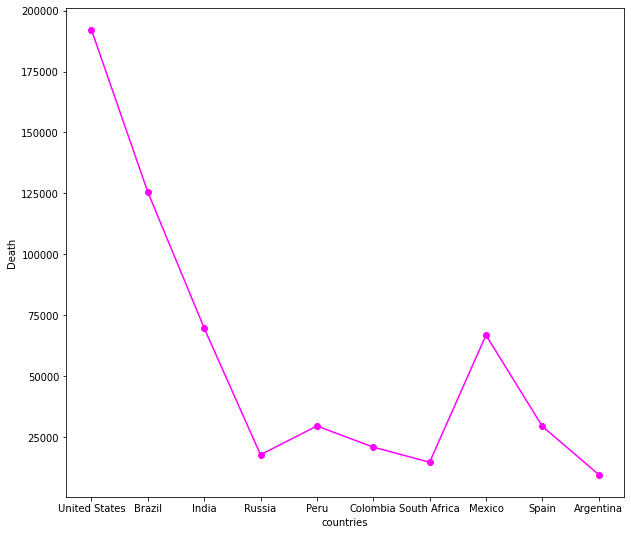

In [ ]:
country_=corona['country']# visualization
plt.plot(country_[0:10],corona.Deaths[0:10],color='magenta',marker='o',)# plot between   top 10 countries and their deaths
plt.xlabel('countries')
plt.ylabel('Death')
plt.rcParams["figure.figsize"] = (15,9)# resizing plot
plt.show()


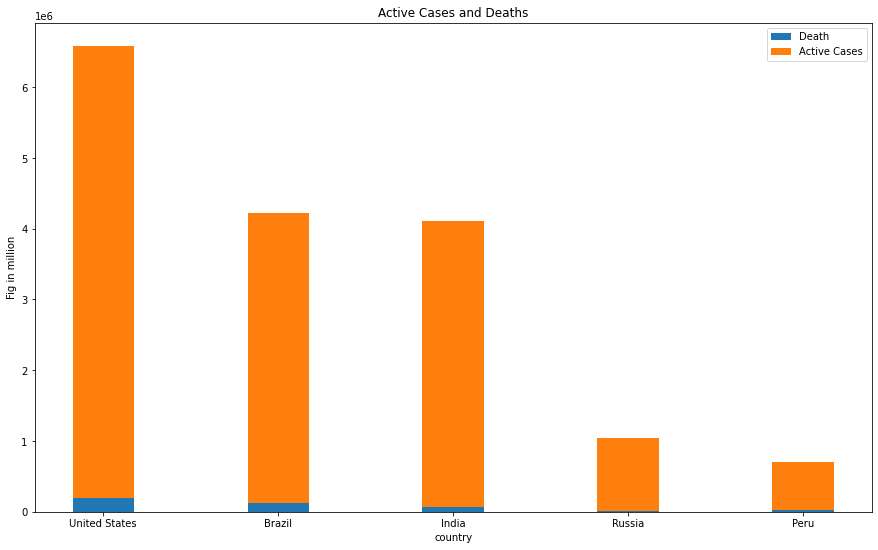

In [ ]:
active=corona['Active Cases']# visuliazation
fig, ax = plt.subplots()
width=0.35
ax.bar(country_[0:5],corona.Deaths[0:5], width, label='Death')
ax.bar(country_[0:5],active[0:5], width, bottom=corona.Deaths[0:5],
       label='Active Cases')# plot between top 5 countries and comparision of their active cases and  deaths

ax.set_xlabel('country')
ax.set_ylabel('Fig in million')
ax.set_title('Active Cases and Deaths')
ax.legend()


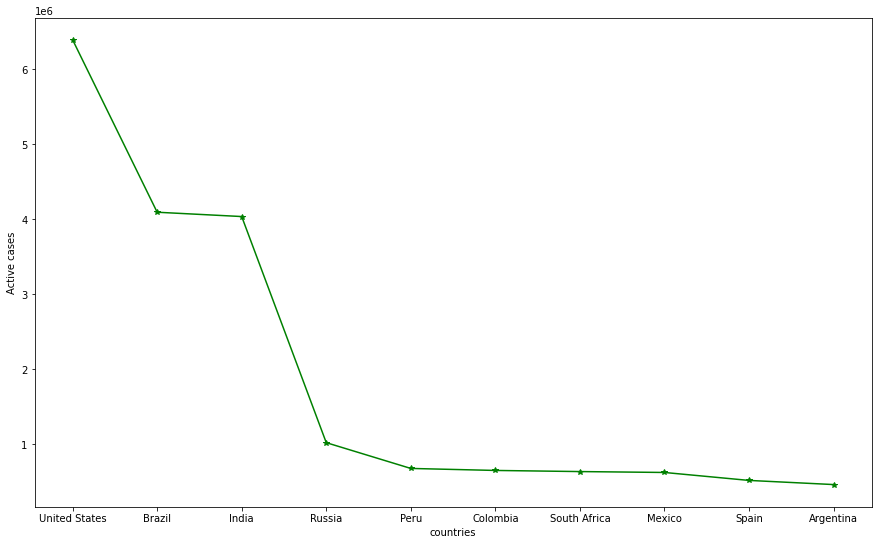

In [ ]:
plt.plot(country_[0:10],active[0:10],color='green',marker='*')# visulaization- plot between top 10 countries  and their active  cases
plt.xlabel('countries')
plt.ylabel('Active cases')
plt.rcParams["figure.figsize"] = (10,9)


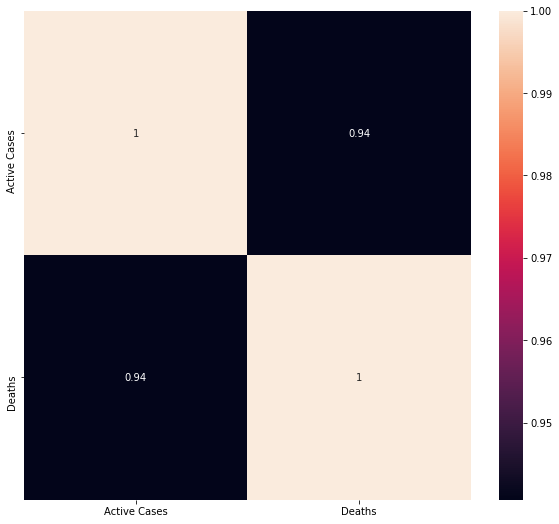

In [ ]:
corr_matrix=corona.corr()
sns.heatmap(corr_matrix, annot=True)# corellation plot to check if their is a relation between active cases and deaths
plt.show()

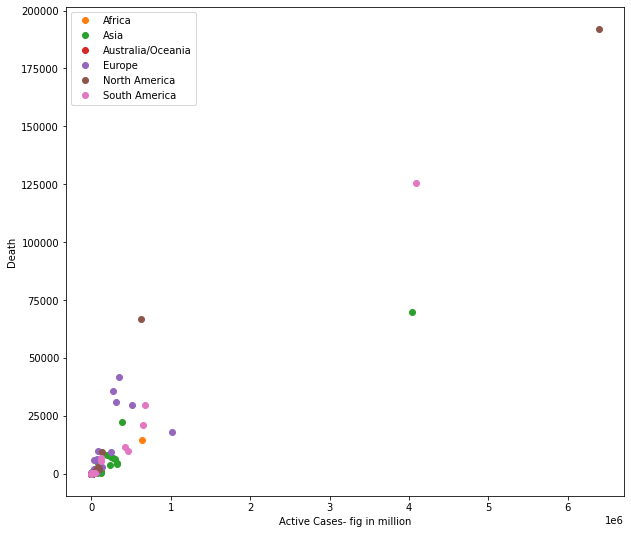

In [ ]:
groups = corona.groupby("Continent")
for ac,de  in groups:     # plot between  cases and deaths  classifing by continent  where each dot represents a country
     plt.plot(de["Active Cases"], de["Deaths"], marker="o", linestyle="", label=ac)
plt.legend()
plt.xlabel('Active Cases- fig in million')
plt.ylabel('Death')  
plt.rcParams["figure.figsize"] = (10,6)   

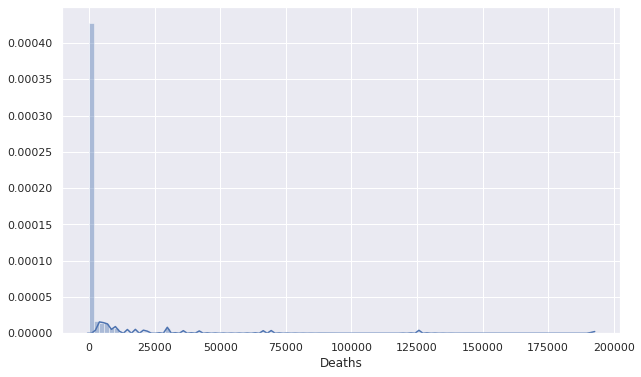

In [ ]:
sns.set(style='darkgrid')
sns.distplot(corona['Deaths'],bins=100,)
# The probabilty desnity for deaths less than 1000 is very hight relativ to other deaths numerically


In [ ]:
# forecasting corona spread in  USA
forecast=pd.read_csv('/content/us-numbers-who-covid-analysis-QueryResult.csv')# time seires data set
forecast

,date,us_total_cases,us_new_cases,us_new_deaths,us_total_deaths
0,2020-09-02,6075652,44639,1091,184689
1,2020-09-01,6031013,33850,529,183598
2,2020-08-31,5997163,35581,290,183069
3,2020-08-30,5961582,44143,1006,182779
4,2020-08-29,5917439,49654,949,181773
...,...,...,...,...,...
242,2020-01-04,0,0,0,0
243,2020-01-03,0,0,0,0
244,2020-01-02,0,0,0,0
245,2020-01-01,0,0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
new_data=forecast.reindex(index=forecast.index[::-1])  # re arranging dates
new_data

,date,us_total_cases,us_new_cases,us_new_deaths,us_total_deaths
246,2019-12-31,0,0,0,0
245,2020-01-01,0,0,0,0
244,2020-01-02,0,0,0,0
243,2020-01-03,0,0,0,0
242,2020-01-04,0,0,0,0
...,...,...,...,...,...
4,2020-08-29,5917439,49654,949,181773
3,2020-08-30,5961582,44143,1006,182779
2,2020-08-31,5997163,35581,290,183069
1,2020-09-01,6031013,33850,529,183598


In [ ]:
new_data.isnull().any() # checking for missing vlaues

date               False
us_total_cases     False
us_new_cases       False
us_new_deaths      False
us_total_deaths    False
dtype: bool

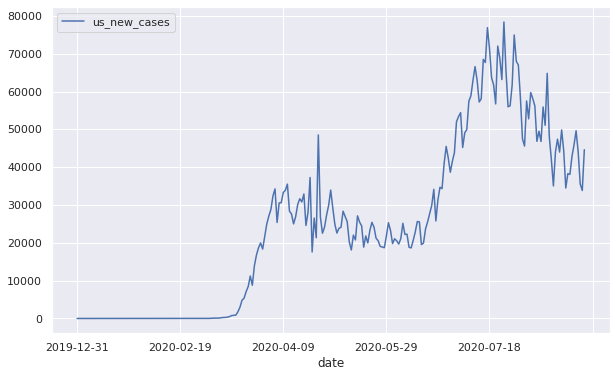

In [ ]:
new_data.plot('date','us_new_cases') # plotting time series

In [ ]:
new_data['us_new_cases']=new_data['us_new_cases']-new_data['us_new_cases'].shift(1)  # making data stationary
new_data

,date,us_total_cases,us_new_cases,us_new_deaths,us_total_deaths
246,2019-12-31,0,NaN,0,0
245,2020-01-01,0,0.0,0,0
244,2020-01-02,0,0.0,0,0
243,2020-01-03,0,0.0,0,0
242,2020-01-04,0,0.0,0,0
...,...,...,...,...,...
4,2020-08-29,5917439,3745.0,949,181773
3,2020-08-30,5961582,-5511.0,1006,182779
2,2020-08-31,5997163,-8562.0,290,183069
1,2020-09-01,6031013,-1731.0,529,183598


In [ ]:

new_data=new_data.drop(['us_new_deaths','us_total_deaths','us_total_cases'],axis=1) # dropping unessary columns

In [ ]:
new_data.columns=['ds','y']# renamming according to convention of fbprophet
new_data

,ds,y
246,2019-12-31,NaN
245,2020-01-01,0.0
244,2020-01-02,0.0
243,2020-01-03,0.0
242,2020-01-04,0.0
...,...,...
4,2020-08-29,3745.0
3,2020-08-30,-5511.0
2,2020-08-31,-8562.0
1,2020-09-01,-1731.0


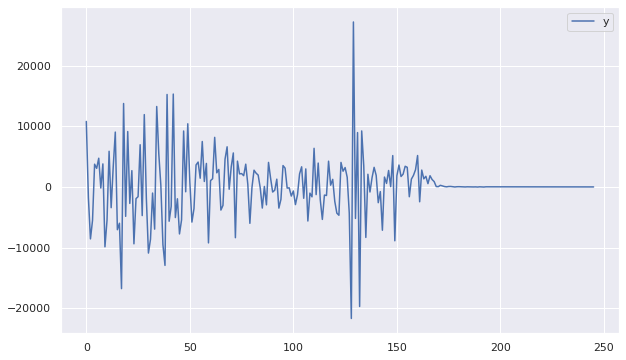

In [ ]:
new_data.plot()# stationary data 

In [ ]:
from fbprophet import  Prophet # imporitng fbprophet

In [ ]:
model=Prophet()
 
model.fit(new_data)  # fitting model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

In [ ]:
future=model.make_future_dataframe(periods=100) # forecsting for next 100 days

In [ ]:
prediction=model.predict(future) # forecsting 

In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-31,79.943295,-5613.287571,6675.419378,79.943295,79.943295,-51.069965,-51.069965,-51.069965,-51.069965,-51.069965,-51.069965,0.0,0.0,0.0,28.873331
1,2020-01-01,80.683192,-3168.055624,8444.567510,80.683192,80.683192,2440.548761,2440.548761,2440.548761,2440.548761,2440.548761,2440.548761,0.0,0.0,0.0,2521.231953
2,2020-01-02,81.423090,-5051.175533,6944.404087,81.423090,81.423090,801.422239,801.422239,801.422239,801.422239,801.422239,801.422239,0.0,0.0,0.0,882.845328
3,2020-01-03,82.162987,-4351.107248,7354.307037,82.162987,82.162987,1323.667690,1323.667690,1323.667690,1323.667690,1323.667690,1323.667690,0.0,0.0,0.0,1405.830677
4,2020-01-04,82.902884,-4498.702931,6983.815978,82.902884,82.902884,1365.966998,1365.966998,1365.966998,1365.966998,1365.966998,1365.966998,0.0,0.0,0.0,1448.869882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-12-07,332.916172,-9747.765714,2138.425319,332.911728,332.921273,-4041.289688,-4041.289688,-4041.289688,-4041.289688,-4041.289688,-4041.289688,0.0,0.0,0.0,-3708.373516
343,2020-12-08,333.655704,-5555.131870,6407.568942,333.651166,333.660895,-51.069965,-51.069965,-51.069965,-51.069965,-51.069965,-51.069965,0.0,0.0,0.0,282.585740
344,2020-12-09,334.395237,-3447.917854,8703.690868,334.390623,334.400500,2440.548761,2440.548761,2440.548761,2440.548761,2440.548761,2440.548761,0.0,0.0,0.0,2774.943998
345,2020-12-10,335.134769,-4539.665125,6918.864038,335.130086,335.140138,801.422239,801.422239,801.422239,801.422239,801.422239,801.422239,0.0,0.0,0.0,1136.557008


In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
342,2020-12-07,-3708.373516,-9747.765714,2138.425319
343,2020-12-08,282.585740,-5555.131870,6407.568942
344,2020-12-09,2774.943998,-3447.917854,8703.690868
345,2020-12-10,1136.557008,-4539.665125,6918.864038
346,2020-12-11,1659.541992,-4419.782262,7642.056717


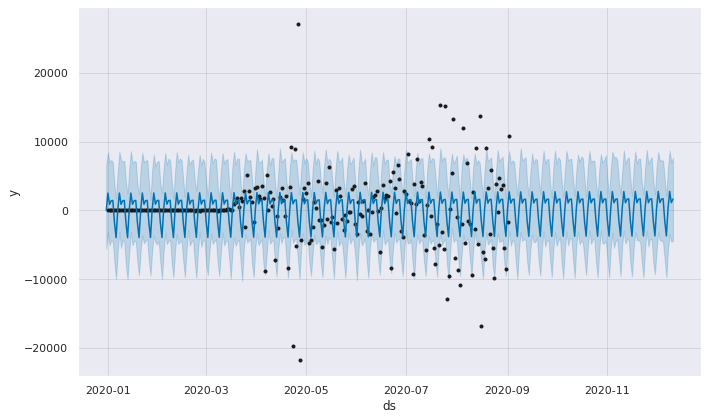

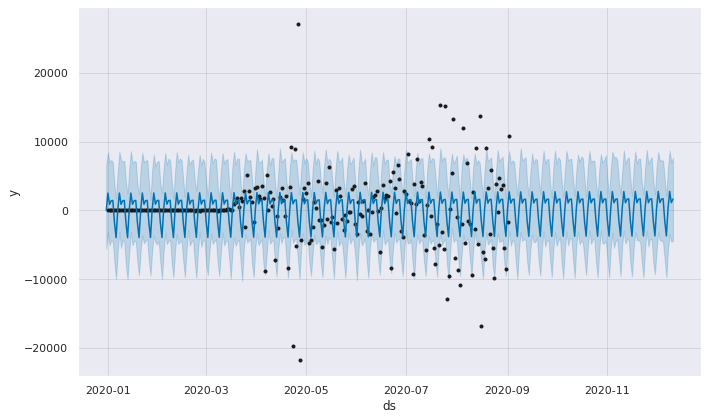

In [ ]:
model.plot(prediction,figsize=(10,6))  # forecasted plot

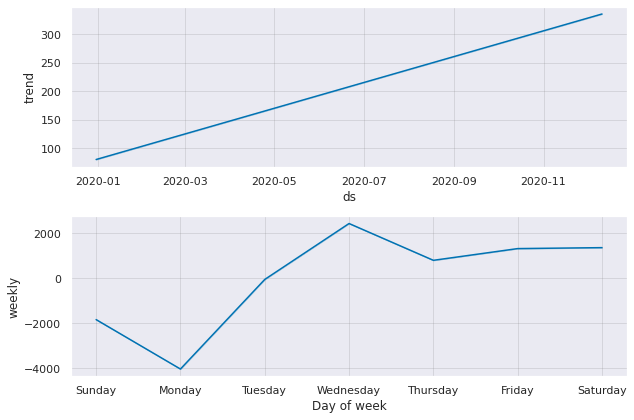

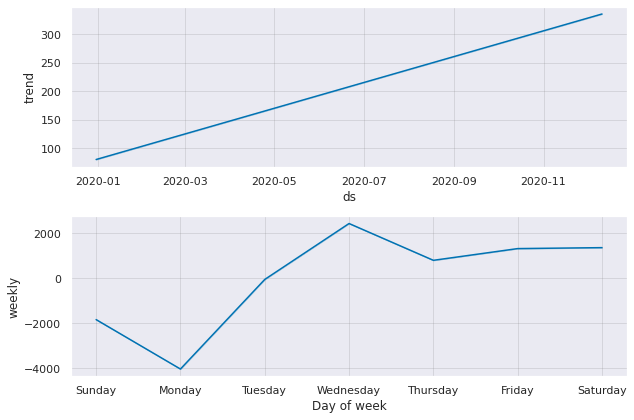

In [ ]:
model.plot_components(prediction) # plottign trends over the course of 100 days

In [ ]:
from fbprophet.diagnostics import cross_validation # checking model performance
model_cross=cross_validation(model,horizon='50 days')


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-06-19 00:00:00 and 2020-07-14 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-20,732.408437,-3971.141705,5161.455624,2147.0,2020-06-19
1,2020-06-21,745.207664,-4048.200995,5469.445428,4249.0,2020-06-19
2,2020-06-22,-2475.608216,-7467.842864,2535.890254,-8365.0,2020-06-19
3,2020-06-23,361.849132,-4296.267145,4981.719238,5597.0,2020-06-19
4,2020-06-24,1081.733326,-3591.545877,6003.809852,3330.0,2020-06-19
...,...,...,...,...,...,...
95,2020-08-29,1438.218874,-2885.096171,6170.131258,3745.0,2020-07-14
96,2020-08-30,632.657733,-3962.915849,5553.157675,-5511.0,2020-07-14
97,2020-08-31,-2210.660214,-6955.626167,2513.075645,-8562.0,2020-07-14
98,2020-09-01,1083.724001,-3666.954547,5971.862993,-1731.0,2020-07-14


In [ ]:
from fbprophet.diagnostics import performance_metrics
perform=performance_metrics(model_cross)
perform.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,5 days,3.201507e+07,5658.186471,5048.234841,0.976238,0.833367,0.4
1,6 days,2.421414e+07,4920.787009,4149.234040,1.045726,0.879983,0.5
2,7 days,2.845131e+07,5333.976983,4696.083605,0.943538,0.839931,0.4
3,8 days,4.030818e+07,6348.872730,5166.373333,0.971314,0.913027,0.5
4,9 days,3.621103e+07,6017.560392,4763.686133,1.007852,0.974810,0.7


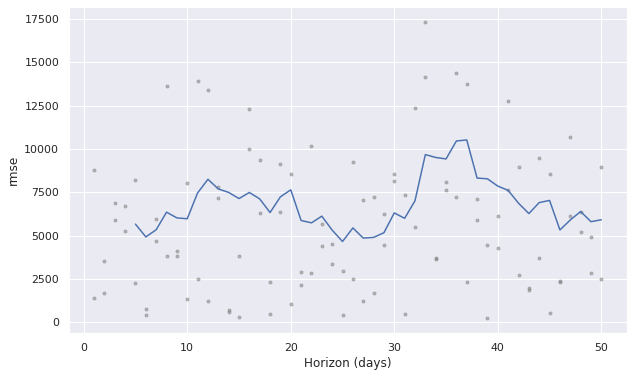

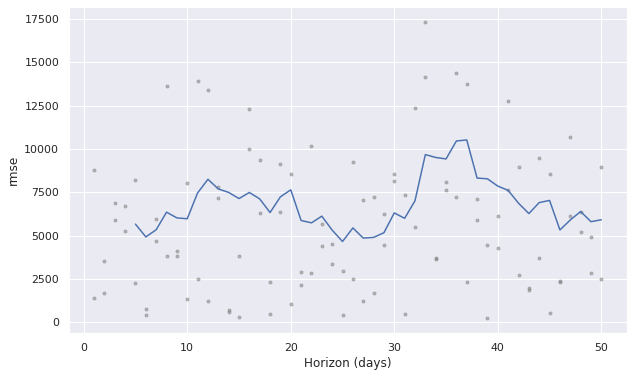

In [ ]:
# visulaizing performance metrics
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(model_cross,metric='rmse')